In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np

images_folder = "../images"
oppenheimer = "oppenheimer.png"
explosion = "atomicbomb.jpg"
flatbarbie = "barbie_flat.png"
faded = "low.png"

path_oppenheimer = os.path.join(images_folder, oppenheimer)
path_explosion = os.path.join(images_folder, explosion)
path_flatbarbie =  os.path.join(images_folder, flatbarbie)
path_faded = os.path.join(images_folder, faded)

oppenheimer = cv2.imread(path_oppenheimer)
explosion = cv2.imread(path_explosion)
flatbarbie = cv2.imread(path_flatbarbie)
faded = cv2.imread(path_faded)

# 1 Oppenheimer’s Poster

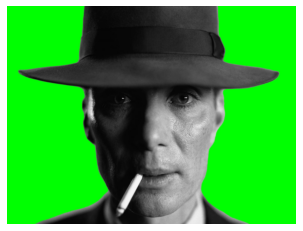

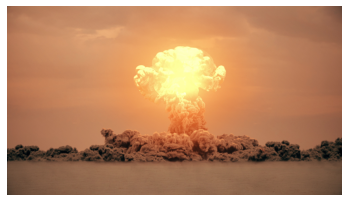

In [2]:
oppenheimer = cv2.cvtColor(oppenheimer, cv2.COLOR_BGR2RGB)
plt.imshow(oppenheimer)
plt.axis("off")
plt.show()

explosion = cv2.cvtColor(explosion, cv2.COLOR_BGR2RGB)
plt.imshow(explosion)
plt.axis("off")
plt.show()

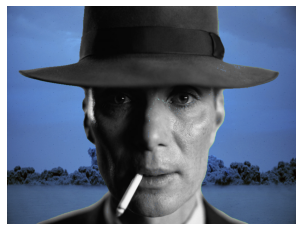

True

In [3]:
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

explosion_resized = cv2.resize(explosion, (oppenheimer.shape[1], oppenheimer.shape[0]))

# Create a mask for the green screen area
green_mask = cv2.inRange(oppenheimer, lower_green, upper_green)

# Invert the mask to get the non-green areas
inverse_mask = cv2.bitwise_not(green_mask)

# Extract the non-green areas from oppenheimer and image

oppenheimer_profile = cv2.bitwise_and(oppenheimer, oppenheimer, mask=inverse_mask)
explosion_background = cv2.bitwise_and(explosion_resized, explosion_resized, mask = green_mask)

# Combine the non-green area and the sky image
result = cv2.add(oppenheimer_profile, explosion_background)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result)
plt.axis("off")
plt.show()

cv2.imwrite("../images/results/res.jpg", result)

## How many images of size 720 x 480 can be stored if cloud of size 2 GB is available ?

### 1. Each pixel is usually represented by 3 bytes. 
### Image site in bytes = 


# 2 Quantized Explosion

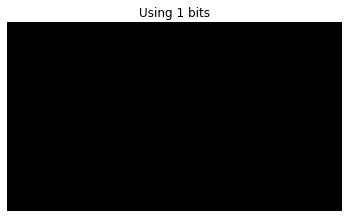

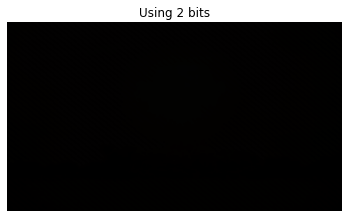

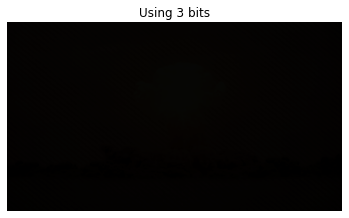

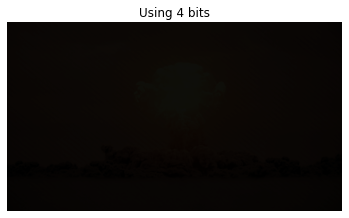

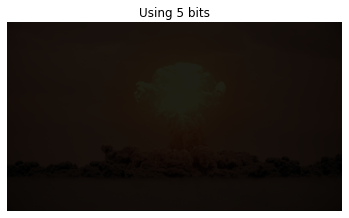

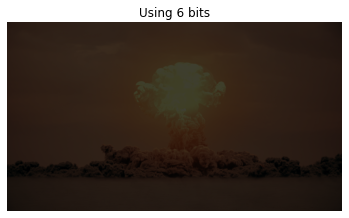

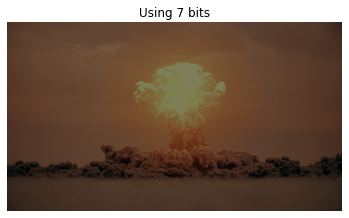

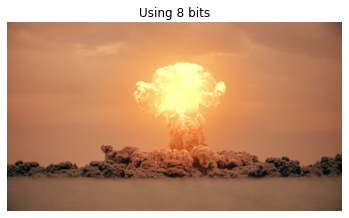

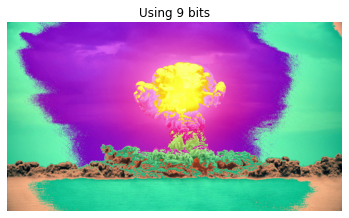

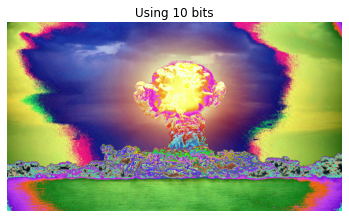

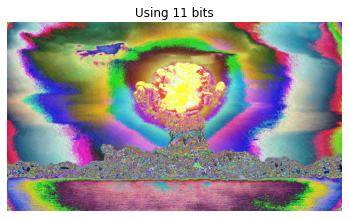

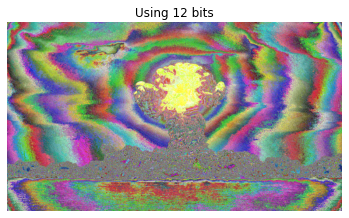

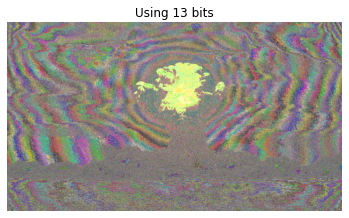

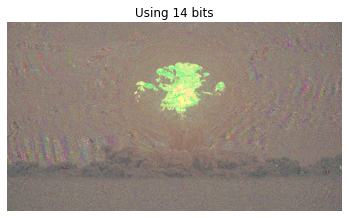

In [7]:
def bitQuantizeImage(im ,k):

    normalized_image = im/255.0
    # if k <= 0 or k > 8:
    #     raise ValueError("Number of bits (k) must be between 1 and 8")

    # Calculate the quantization factor based on the number of bits
    quantized_image= normalized_image*(2**(k)-1)

    # Perform the quantization
    # quantized_image = (im // quantization_factor) * quantization_factor

    return quantized_image.astype(np.uint8)


for i in range (1,15):
    quantized_explosion = bitQuantizeImage(explosion,i)
    plt.imshow(quantized_explosion)
    plt.title(f"Using {i} bits")
    plt.axis("off")
    plt.show()
    

# 3 Colour Corrected Barbie

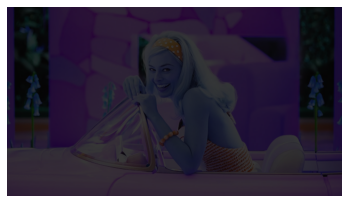

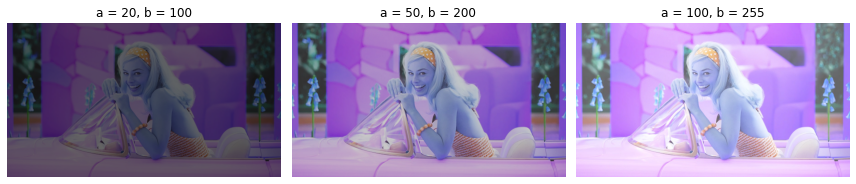

In [5]:
#Display the original and stretched images
plt.imshow(flatbarbie)
plt.axis("off")
plt.show()

import cv2
import numpy as np
import matplotlib.pyplot as plt
 
min_intensity = np.min(flatbarbie)
max_intensity = np.min(flatbarbie)

def linContrastStretching(im, a, b):
    stretched_im = np.copy(im)
    
    # Apply contrast stretching to each color channel
    for channel in range(stretched_im.shape[2]):
        channel_min = np.min(stretched_im[:,:,channel])
        channel_max = np.max(stretched_im[:,:,channel])
        stretched_im[:,:,channel] = ((stretched_im[:,:,channel] - channel_min) / (channel_max - channel_min)) * (b - a) + a
    
    return stretched_im

# Apply linContrastStretching and plot the results for various a, b values

a_values = [20,50,100]
b_values = [100, 200,255]



plt.figure(figsize=(12, 6))

for a, b in zip(a_values, b_values):
    stretched_image = linContrastStretching(flatbarbie,a,b)
    plt.subplot(1, len(a_values), a_values.index(a) + 1)
    plt.imshow(stretched_image, cmap='gray')
    plt.title(f'a = {a}, b = {b}')
    plt.axis('off')

plt.tight_layout()
plt.show()


#v2.imwrite("../images/results/colouredBarbie.jpg", stretched_image)

# 4 Histogram Equalisation

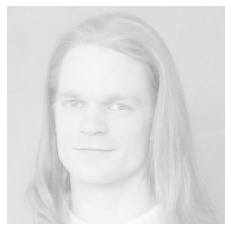

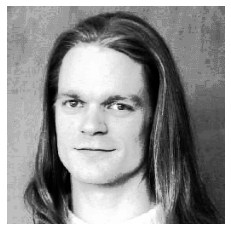

True

In [6]:
def histEqualization(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize the CDF to the range [0, 255]
    cdf_normalized = cdf * 255 / cdf[-1]

    # Use linear interpolation to create the new pixel values
    equalized_image = np.interp(image.flatten(), np.arange(0, 256), cdf_normalized).reshape(image.shape)

    return equalized_image.astype(np.uint8)

equalized = histEqualization(faded)

plt.imshow(faded)
plt.axis("off")
plt.show()

plt.imshow(equalized)
plt.axis("off")
plt.show()

cv2.imwrite("../images/results/histEqualized.png", equalized)

# 5 Explosion Effects

# 6 Oppie’s Filter